In [3]:
!pip install imblearn
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install joblib
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 37.6 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 11.2 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


# Prediksi Hujan di Denpasar

Praktikum ini menggunakan _dataset_ [Denpasar Weather Data](https://www.kaggle.com/datasets/cornflake15/denpasarbalihistoricalweatherdata?select=openweatherdata-denpasar-1990-2020v0.1.csv) dengan modifikasi. _Dataset_ digunakan untuk melakukan prediksi penarikan kesimpulan kebenaran kondisi hujan pada kondisi tertentu. Hal itu diperoleh dengan meninjau `raining` (diekstrak dari `weather_main`) sebagai target. Fitur yang digunakan adalah sebagai berikut:
- `hour` (diekstrak dari `dt_iso`)
- `temp`
- `temp_min`
- `temp_max`
- `pressure`
- `humidity`
- `wind_speed`
- `wind_deg`

Tujuan praktikum:
1.   Peserta memahami rangkaian proses analitik data menggunakan pendekatan pembelajaran mesin. 
2.   Peserta memahami bahwa proses pengembangan model pembelajaran mesin juga ditentukan dari kualitas data, penanganan data, dan penentuan algoritma serta hiperparameternya; tidak cukup hanya dengan memastikan implementasi algoritma berjalan tanpa kesalahan.
3.   Peserta mampu menginterpretasikan hasil dari evaluasi model dalam proses analitik menggunakan pendekatan pembelajaran mesin.

Praktikum dilaksanakan secara berkelompok. Setiap kelompok terdiri atas 2 mahasiswa. Perhatikan bahwa terdapat berkas yang harus dikumpulkan sebelum waktu praktikum selesai (17 April 2023, pukul 10.59 WIB) dan berkas yang dikumpulkan setelah waktu praktikum selesai (17 April 2023, pukul 23.59 WIB).

# Persiapan Data

In [4]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import joblib

In [5]:
data = pd.read_csv("openweatherdata-denpasar-1990-2020v0.1-simplified.csv")
data

,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
0,0,25.82,25.82,25.82,1010.0,86,1.36,225,True
1,1,26.20,26.20,26.20,1011.0,84,2.09,247,True
2,2,26.45,26.45,26.45,1011.0,84,2.44,262,True
3,3,26.80,26.80,26.80,1011.0,82,2.29,271,True
4,4,27.04,27.04,27.04,1010.0,82,1.71,274,False
...,...,...,...,...,...,...,...,...,...
264919,19,27.00,27.00,27.00,1007.0,94,4.10,300,False
264920,20,27.00,27.00,27.00,1007.0,94,5.70,300,False
264921,21,28.00,28.00,28.00,1007.0,83,6.70,290,False
264922,22,28.00,28.00,28.00,1007.0,83,6.20,290,False


In [6]:
X = data.drop(columns="raining")
y = data["raining"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

df_train = pd.concat([X_train, y_train], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

# Soal

Disediakan data yang sudah dibagi menjadi data latih (`df_train`), data validasi (`df_val`), dan data uji (`df_test`).

**Bagian 1**: (batas waktu: 17 April 2023, 10.59 WIB)

1. Buatlah _baseline_ dengan menggunakan model _logistic regression_.
2. Lakukan analisis data terkait hal berikut:
    - _duplicate value_,
    - _missing value_,
    - _outlier_,
    - _balance of data_.
3. Jelaskan rencana penanganan yang ada pada poin 2.
4. Jelaskan teknik _encoding_ yang digunakan terhadap data yang disediakan, disertai dengan alasan.
5. Buatlah desain eksperimen dengan menentukan hal berikut:
    - tujuan eksperimen,
    - variabel dependen dan independen,
    - strategi eksperimen,
    - skema validasi.
    
**Bagian 2**: (batas waktu: 17 April 2023, 23.59 WIB)

6. Implementasikan strategi eksperimen dan skema validasi yang telah ditentukan pada poin 5.
7. Berdasarkan hasil prediksi yang dihasilkan, buatlah kesimpulan analisis karakteristik kondisi hujan.

---

Jika terdapat perubahan jawaban pada poin 1—5 (contoh: perbedaan penanganan _outlier_), jelaskan pada laporan mengenai jawaban sebelum, jawaban sesudah, dan alasan pengubahan jawaban.

# Bagian 1

### 1. Baseline Model

In [ ]:
baseline_model = LogisticRegression(max_iter=10000).fit(X_train, y_train)

baseline_prediction = baseline_model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, baseline_prediction))
print('Precision: ', precision_score(y_test, baseline_prediction))
print('Recall: ', recall_score(y_test, baseline_prediction))
print('F1: ', f1_score(y_test, baseline_prediction))
print(confusion_matrix(y_test, baseline_prediction))

Accuracy:  0.8728508068321224
Precision:  0.5824675324675325
Recall:  0.12830782434558718
F1:  0.21029187668503105
[[45351   643]
 [ 6094   897]]


## 2. Analisis data terkait

### a. duplicate value

In [ ]:
duplicate = df_train.duplicated().sum()
print("Baris duplikat berjumlah: ", duplicate)

no_hour = df_train.drop("hour", axis=1).duplicated().sum()
print("Baris duplikat tanpa jam: ", no_hour)

Baris duplikat berjumlah:  3309
Baris duplikat tanpa jam:  19063


### b. missing value

In [ ]:
missing = df_train.isna().sum()
print("Jumlah value yang missing: ", missing)

Jumlah value yang missing:  hour          0
temp          0
temp_min      0
temp_max      0
pressure      0
humidity      0
wind_speed    0
wind_deg      0
raining       0
dtype: int64


### c. outlier

In [11]:
df_outlier = df_train.select_dtypes(include=["float64", "int64"])
for x in df_outlier.columns:
    q1 = df_outlier[x].quantile(0.25)
    q3 = df_outlier[x].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    print(x, len(df_outlier[(df_outlier[x] < lower) | (df_outlier[x] > upper)]))


hour 0
temp 838
temp_min 1061
temp_max 322
pressure 682
humidity 150
wind_speed 2219
wind_deg 0


Berikut visualisasi outlier dengan mengugnakan boxplot

In [ ]:
df_train

,hour,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
240543,8,25.81,25.5,26.0,1007.0,88,2.1,360,True
204469,4,30.74,30.3,31.0,1008.0,71,3.6,260,False
172582,15,25.85,25.7,26.0,1011.7,80,6.2,120,False
152371,3,30.20,30.2,30.2,1010.3,71,3.1,110,False
142487,13,27.64,27.4,28.0,1010.2,74,3.6,250,False
...,...,...,...,...,...,...,...,...,...
230860,7,28.83,28.7,29.0,1011.0,79,3.1,100,True
180518,22,25.80,25.8,25.8,1009.4,93,3.6,130,True
216105,16,26.81,26.5,27.0,1013.0,78,5.7,110,False
237490,16,27.15,27.0,27.4,1010.0,88,1.0,0,False


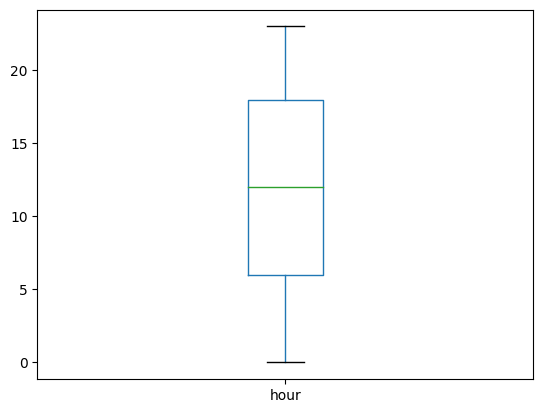

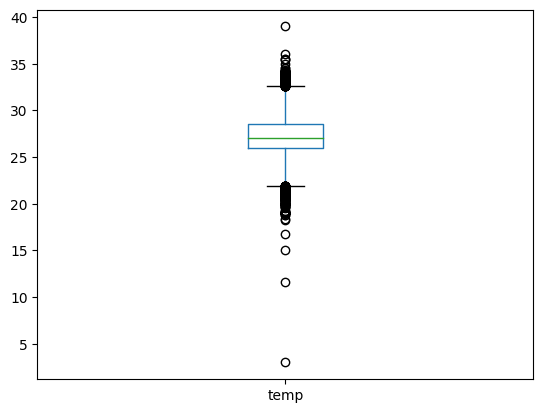

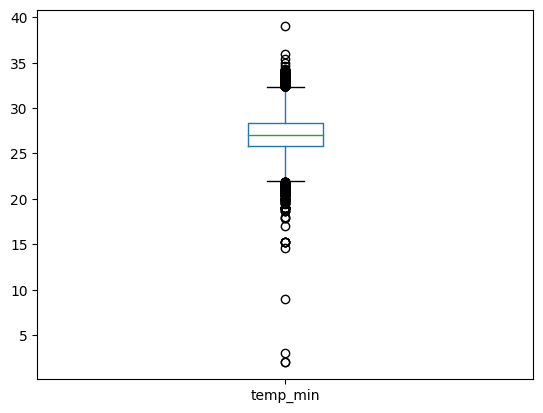

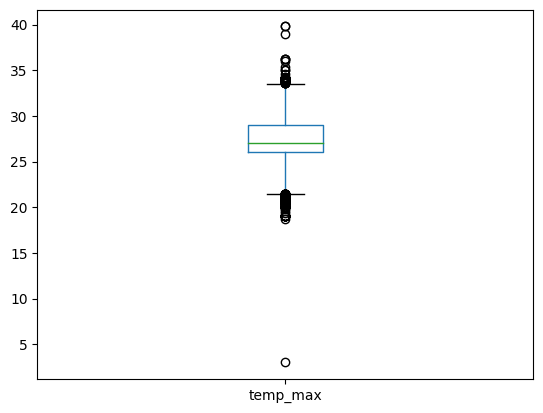

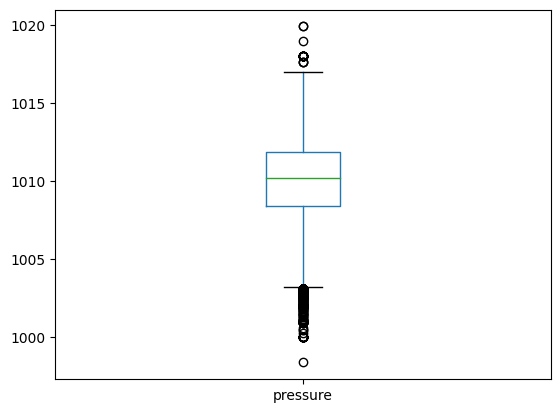

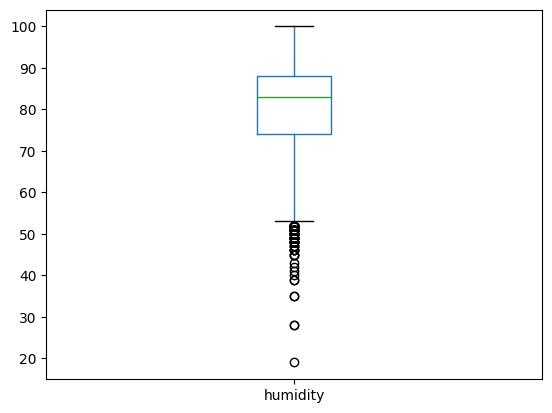

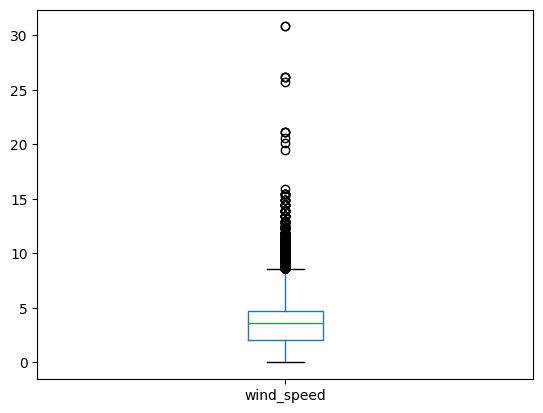

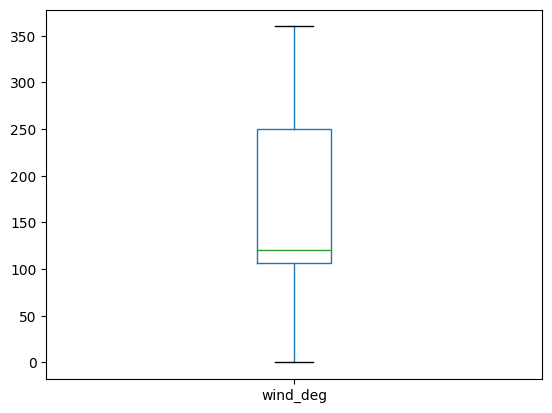

In [ ]:
data_to_visualize = df_train.select_dtypes(include=["float64", "int64"])
for col in data_to_visualize:
    df_train[col].plot(kind="box")
    plt.show()

### d. balance of data

In [ ]:
df_train["raining"].value_counts()

False    147238
True      22313
Name: raining, dtype: int64

## 3. Rencana Penanganan

Dataset yang diberikan sudah nampak bersih sehingga tidak perlu dilakukan penambahan fitur pada dataset.

Setelah itu ketika dicek nilai missing values yang ada pada dataset berikut hasilnya bernilai nol untuk seluruh attribut. Sehingga kita tidak perlu menangani missing values karena tidak ada yang perlu ditangani

Jika kita memperhitungkan nilai hour pada dataset maka hanya terdapat 3309 rows namun jika kita menghapus column `hour` maka terdapat 19063 rows yang duplikat. Hal ini terjadi karena banyak dataset dengan jam yang berbeda namun memiliki sisa parameter yang sama.  Sehingga data duplikat duplikat ini perlu kita tanangani dengan cara drop column hour dan hapus duplikatnya

Untuk nilai outlier, akan dicek terlebih dahulu visualisasi data outliner dengan boxplot. Hal ini akan memudahkan data mana yang akan didrop dengan mengecek outlier outlier yang ekstrim.

Kemudian untuk balance of data, dapat dilihat bahwa data tidak balance karena terdapat selisih yang besar pada nilai true (2213)  false (147238) di attribute raining . Sehingga nanti akan dilakukan Oversampling dan Undersampling untuk menangani imbalance dataset.

Kami juga akan melakukan encoding yang dijelaskan di bagian `4. Teknik Encoding`.

Terakhir akan dilakukan scaling (normalisasi) dengan MinMaxScaling karena pada beberapa model seperti SVM hal ini akan sangat berpengaruh pada hasil yang dihasilkan jika kita bandingkan dengan data yang belum di scale d. namun untuk beberapa model seperti decision tree hal ini tidak terlalu berpengaruh. Sehingga tetap akan dilakukan normalisasi walaupun nantinya model yang digunakan berupa decision tree.

## 4. Teknik Encoding

Untuk paramater cuaca tidak perlu dilakukan encoding karena sudah dalam bentuk nilai yang kontinu. 

Untuk kolom raining, akan dilakukan encoding dengan teknik Label Encoding, dimana nilai True akan direpresentasikan dengan nilai 1 dan nilai false direpresentasikan dengan nilai 0

## 5. Desain Eksperimen

- Tujuan Eksperimen

Eksperimen ini akan mencari hyper parameter untuk suatu model sehingga bisa memprediksi dataset dan menghasilkan model untuk mengecek apakah dengan parameter cuaca yang ada menghasilkan hujan atau tidak

- Variabel Dependen dan Independen

Variabel Dependen: raining

Variabel Independen: temp, temp_min, temp_max, pressure, humidity, wind_speed, wind_deg

- Strategi Eksperimen

Pada eksprimen ini akan digunakan beberapa model untuk mencari prediksi rain yang paling accurate. Sebelumnya, akan dilakukan terlebih dahulu preprocessing data dengan mengacu pada bagian rencana penanganan. Kemudian akan ditambahkan penghapusan kolom hour dari data

- Skema Validasi

Skema validasi yang akan digunakan adalah cross-validation dengan fold 5. Hal ini ditujukan untuk efisiensi waktu yang bagus tetapi masih mendapatkan validasi yang akurat

# Bagian 2

Pada bagian ini akan menjalankan desain eksperimen yang sebelumnya telah dibuat

### Drop duplicate Pada data 

Kolom hour akan di drop lalu akan di hapus data data yang berduplikat

In [11]:
df_train_dropped_hour = df_train.drop(columns="hour", axis=1)
df_train_dropped_hour.drop_duplicates(inplace=True)
df_train_dropped_hour

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
240543,25.81,25.5,26.0,1007.0,88,2.1,360,True
204469,30.74,30.3,31.0,1008.0,71,3.6,260,False
172582,25.85,25.7,26.0,1011.7,80,6.2,120,False
152371,30.20,30.2,30.2,1010.3,71,3.1,110,False
142487,27.64,27.4,28.0,1010.2,74,3.6,250,False
...,...,...,...,...,...,...,...,...
190367,25.80,25.6,26.0,1012.0,82,4.1,120,False
230860,28.83,28.7,29.0,1011.0,79,3.1,100,True
180518,25.80,25.8,25.8,1009.4,93,3.6,130,True
216105,26.81,26.5,27.0,1013.0,78,5.7,110,False


### Drop outlier

Data akan dibersihkan dengan cara menghilangkan data data outlier pada dataset. dengan cara mengambil nilai nilai yang masih berada pada rentang minimum dan maximum range

In [ ]:
df_train_dropped_outlier = df_train_dropped_hour
col_name = df_train_dropped_hour.select_dtypes(include=["float64", "int64"]).columns

for col in col_name:
    q1 = df_train_dropped_hour[col].quantile(0.25)
    q3 = df_train_dropped_hour[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    df_train_dropped_outlier = df_train_dropped_outlier[((df_train_dropped_outlier[col] < upper_bound) & (df_train_dropped_outlier[col] > lower_bound))]

df_train_dropped_outlier

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
240543,25.81,25.5,26.0,1007.0,88,2.1,360,True
204469,30.74,30.3,31.0,1008.0,71,3.6,260,False
172582,25.85,25.7,26.0,1011.7,80,6.2,120,False
152371,30.20,30.2,30.2,1010.3,71,3.1,110,False
142487,27.64,27.4,28.0,1010.2,74,3.6,250,False
...,...,...,...,...,...,...,...,...
190367,25.80,25.6,26.0,1012.0,82,4.1,120,False
230860,28.83,28.7,29.0,1011.0,79,3.1,100,True
180518,25.80,25.8,25.8,1009.4,93,3.6,130,True
216105,26.81,26.5,27.0,1013.0,78,5.7,110,False


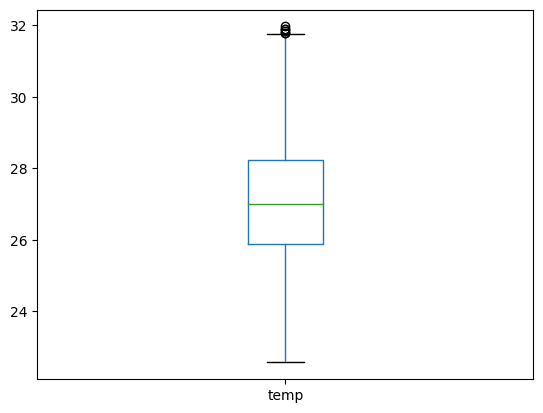

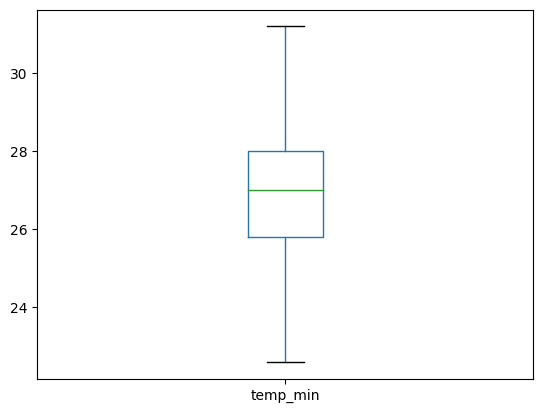

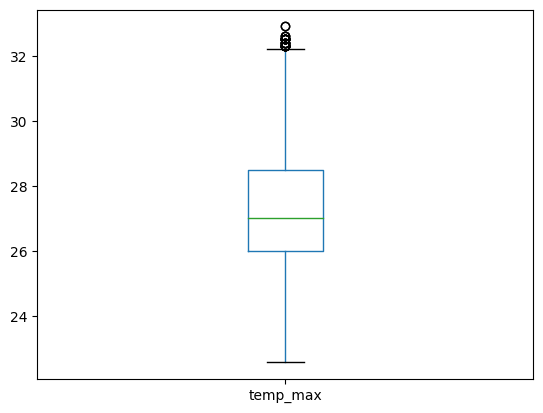

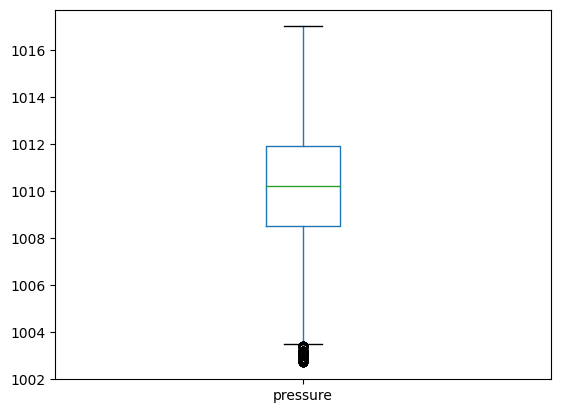

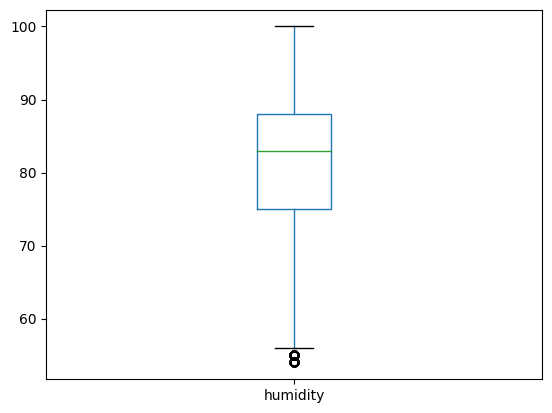

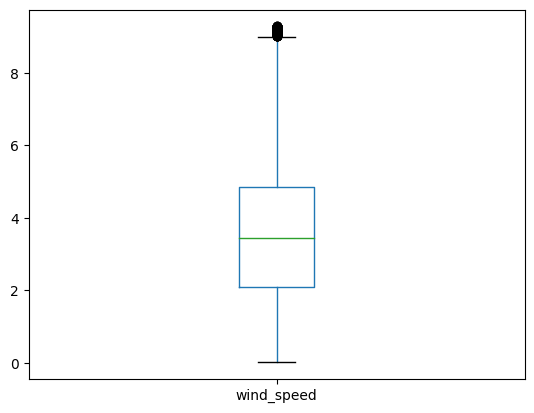

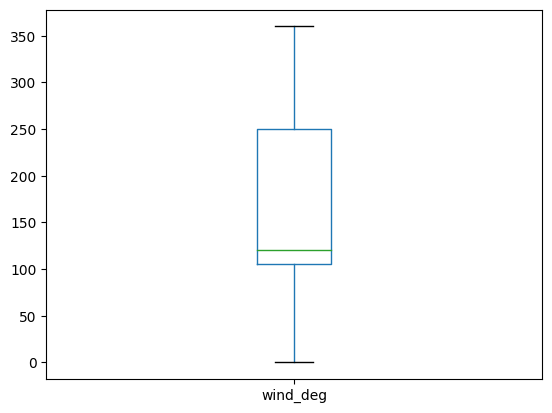

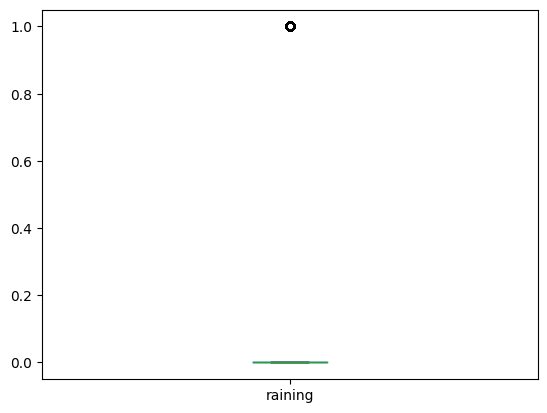

In [ ]:
for col in df_train_dropped_outlier:
    df_train_dropped_outlier[col].plot(kind="box")
    plt.show()

### Encoding

Kolom 'raining' akan direpresentasikan dengan 1 untuk True dan 0 untuk False menggunakan Label Encoding

In [ ]:
encoder = LabelEncoder()
df_train_encode = df_train_dropped_outlier
df_train_encode["raining"] = encoder.fit_transform(df_train_encode["raining"])
df_train_encode

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,raining
240543,25.81,25.5,26.0,1007.0,88,2.1,360,1
204469,30.74,30.3,31.0,1008.0,71,3.6,260,0
172582,25.85,25.7,26.0,1011.7,80,6.2,120,0
152371,30.20,30.2,30.2,1010.3,71,3.1,110,0
142487,27.64,27.4,28.0,1010.2,74,3.6,250,0
...,...,...,...,...,...,...,...,...
190367,25.80,25.6,26.0,1012.0,82,4.1,120,0
230860,28.83,28.7,29.0,1011.0,79,3.1,100,1
180518,25.80,25.8,25.8,1009.4,93,3.6,130,1
216105,26.81,26.5,27.0,1013.0,78,5.7,110,0


### Balancing Data & Scaling

Akan diinisialisasi data oversampling dan undersampling yang nanti akan dibandingkan dengan data train normal ketika dilakukan training model

In [ ]:
# Oversampling
smote = SMOTE(random_state=12)
OX_train, Oy_train = smote.fit_resample(X_train, y_train)

# Undersampling
rus = RandomUnderSampler(random_state=12)
UX_train, Uy_train = rus.fit_resample(X_train, y_train)

# Scaling
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_val)
X_val = scaler.transform(X_val)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

scaler.fit(OX_train)
OX_train = scaler.transform(OX_train)

scaler.fit(UX_train)
UX_train = scaler.transform(UX_train)

### Desain Eksperimen

### Decision tree model

In [ ]:
# Init model
decisionTree = DecisionTreeClassifier()
param = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best"],
    "max_depth": [2,4,6,8],
}

# Grid Search
grid_search_normal = GridSearchCV(decisionTree, param, cv=5, scoring='accuracy').fit(X_train, y_train)
grid_search_over = GridSearchCV(decisionTree, param, cv=5, scoring='accuracy').fit(OX_train, Oy_train)
grid_search_under = GridSearchCV(decisionTree, param, cv=5, scoring='accuracy').fit(UX_train, Uy_train)

best_dtc_normal = grid_search_normal.best_estimator_
best_dtc_over = grid_search_over.best_estimator_
best_dtc_under = grid_search_under.best_estimator_

best_dtc_normal.fit(X_train, y_train)
best_dtc_over.fit(OX_train, Oy_train)
best_dtc_under.fit(UX_train, Uy_train)

joblib.dump(best_dtc_normal, "DTCNormal.pkl")
joblib.dump(best_dtc_over, "DTCOver.pkl")
joblib.dump(best_dtc_under, "DTCUnder.pkl")

['DTCUnder.pkl']

In [ ]:
best_normal = joblib.load("DTCNormal.pkl")

y_pred = best_normal.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.7950552043031046
F1:  0.29234278266536334
[[39883  6111]
 [ 4748  2243]]


In [ ]:
best_over = joblib.load("DTCOver.pkl")

y_pred = best_over.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.4744739077097292
F1:  0.2788698106855204
[[19756 26238]
 [ 1607  5384]]


In [ ]:
best_under = joblib.load("DTCUnder.pkl")

y_pred = best_under.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.6020760592620553
F1:  0.3635979474796257
[[25878 20116]
 [  968  6023]]


### Validate using cross validate

In [ ]:
best_normal_scores = cross_validate(best_dtc_normal, X_val, y_val, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'))

print('Accuracy: ', best_normal_scores['test_accuracy'].mean())
print('Precision: ', best_normal_scores['test_precision'].mean())
print('Recall: ', best_normal_scores['test_recall'].mean())
print('F1: ', best_normal_scores['test_f1'].mean())

Accuracy:  0.8806029987808482
Precision:  0.6081638967864131
Recall:  0.27033113111196216
F1:  0.3737368765842969


In [ ]:
best_over_scores = cross_validate(best_dtc_over, X_val, y_val, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'))

print('Accuracy: ', best_over_scores['test_accuracy'].mean())
print('Precision: ', best_over_scores['test_precision'].mean())
print('Recall: ', best_over_scores['test_recall'].mean())
print('F1: ', best_over_scores['test_f1'].mean())

Accuracy:  0.8805558234077067
Precision:  0.6076077524046838
Recall:  0.27015271926464957
F1:  0.3734803163359692


In [ ]:
best_under_scores = cross_validate(best_dtc_under, X_val, y_val, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'))

print('Accuracy: ', best_under_scores['test_accuracy'].mean())
print('Precision: ', best_under_scores['test_precision'].mean())
print('Recall: ', best_under_scores['test_recall'].mean())
print('F1: ', best_under_scores['test_f1'].mean())

Accuracy:  0.880296305980717
Precision:  0.6048222853515314
Recall:  0.2706884335503638
F1:  0.37345973473150196


Setelah di cek menggunakan DTC dan validasi menggunakan cross validate didapat bahwa hasil yang optimal ditunjukan pada dataset undersampling karena selisih antara akurasi dan f1 sangat sedikit dengan hasil validasi oleh cross validate. Sehingga untuk model selanjutnya akan digunakan dataset undersampling untuk data input nya.

### RFC

In [ ]:
# Init model
rfc = RandomForestClassifier()
param = {
    "n_estimators": [150],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [2,4,6,8]
}

# Grid Search
grid_search_rfc_under = GridSearchCV(rfc, param, cv=5, scoring='accuracy').fit(UX_train, Uy_train)

best_rfc_under = grid_search_under.best_estimator_

best_rfc_under.fit(UX_train, Uy_train)

joblib.dump(best_rfc_under, "RFCUnder.pkl")

['RFCUnder.pkl']

In [ ]:
rfc_under_pred = joblib.load("RFCUnder.pkl")

y_pred = rfc_under_pred.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.6023025384542795
F1:  0.36365283565863377
[[25892 20102]
 [  970  6021]]


In [ ]:
best_under_scores = cross_validate(rfc_under_pred, X_val, y_val, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'))

print('Accuracy: ', best_under_scores['test_accuracy'].mean())
print('Precision: ', best_under_scores['test_precision'].mean())
print('Recall: ', best_under_scores['test_recall'].mean())
print('F1: ', best_under_scores['test_f1'].mean())

Accuracy:  0.8804142805910047
Precision:  0.606150516904497
Recall:  0.27033113111196216
F1:  0.37335403311290494


### XGB 

In [ ]:
# Init model
xgb = XGBClassifier()
param = {
    "learning_rate": [0.1, 0.01],
    "max_depth": [3, 5],
    "n_estimators": [50, 100],
    "gamma": [0.1, 0.5, 1]
}

# Grid Search
grid_search_under = GridSearchCV(xgb, param, cv=5, scoring='accuracy').fit(UX_train, Uy_train)

best_xgb_under = grid_search_under.best_estimator_

best_xgb_under.fit(UX_train, Uy_train)

joblib.dump(best_xgb_under, "XGBUnder.pkl")

['XGBUnder.pkl']

In [ ]:
xgb_under_pred = joblib.load("XGBUnder.pkl")

y_pred = xgb_under_pred.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.6319146928375955
F1:  0.3892142432119257
[[27268 18726]
 [  777  6214]]


In [ ]:
best_under_scores = cross_validate(xgb_under_pred, X_val, y_val, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'))

print('Accuracy: ', best_under_scores['test_accuracy'].mean())
print('Precision: ', best_under_scores['test_precision'].mean())
print('Recall: ', best_under_scores['test_recall'].mean())
print('F1: ', best_under_scores['test_f1'].mean())

Accuracy:  0.8911012502559206
Precision:  0.7080725201929307
Recall:  0.2992664049534023
F1:  0.4204168479926021


Pada sel ini, jelaskan pembagian tugas/kerja per anggota kelompok dalam eksperimen.

Muhammad Garebaldhie Er Rahman
- Outlier
- Rencana Penanganan
- Desain Eksperimen
- Preprocessing
- RFC

M Syahrul Surya Putra
- Duplicate Value
- Missing Value
- Data Balance
- Preprocessing
- XGB



# _Deliverable_

_Deliverable_ yang akan dihasilkan adalah sebagai berikut:
1. berkas _notebook_ dengan format nama `PraktikumIF3270_M1_NIM1_NIM2.ipynb` untuk Bagian 1;
2. berkas _notebook_ dengan format nama `PraktikumIF3270_M2_NIM1_NIM2.ipynb` untuk Bagian 1 + Bagian 2; serta
3. berkas laporan dengan format nama `PraktikumIF3270_NIM1_NIM2.pdf` yang mencakup hal berikut:
    - hasil analisis data,
    - penanganan dari hasil analisis data,
    - justifikasi teknik-teknik yang dipilih,
    - perubahan yang dilakukan pada jawaban poin 1—5 jika ada,
    - desain eksperimen,
    - hasil eksperimen.
    - analisis dari hasil eksperimen,
    - kesimpulan,
    - pembagian tugas/kerja per anggota kelompok

Batas waktu pengumpulan:
- _Deliverable_ poin 1: Senin, 17 April 2023, pukul 10.59 WIB
- _Deliverable_ poin 2: Senin, 17 April 2023, pukul 23.59 WIB
- _Deliverable_ poin 3: Senin, 17 April 2023, pukul 23.59 WIB

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c6316c9e-5d75-4550-8ea1-64393339b139' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>